# Hypothèse : Les budgets de production plus élevés conduisent à des recettes plus élevées.

#### Importation des bibliothèques nécessaires

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Chargement des données

In [70]:
# Les chemins vers les fichiers CSV
fichier_movie = 'data/movies_metadata.csv'

# Lecture des fichiers CSV
data_movie = pd.read_csv(fichier_movie, sep=',', encoding='latin-1', low_memory=False)

## Aperçu des données

In [71]:
print("\nAperçu des données Movies :")
data_movie.head()


Aperçu des données Movies :


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## Nettoyage et préparation des données

In [72]:
# Filtrage des colonnes nécessaires
data_movie = data_movie[['budget', 'revenue']]
# Fusion des deux jeux de données sur l'identifiant de l'accident

# Suppression des valeurs manquantes
data = data_movie.dropna()
data.head()

,budget,revenue
0,30000000,373554033.0
1,65000000,262797249.0
2,0,0.0
3,16000000,81452156.0
4,0,76578911.0


In [73]:
data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
data['revenue'] = pd.to_numeric(data['revenue'], errors='coerce')
data = data[(data['budget'] > 0) & (data['revenue'] > 0)]
data

C:\Users\risto\AppData\Local\Temp\ipykernel_24092\3501067427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
C:\Users\risto\AppData\Local\Temp\ipykernel_24092\3501067427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['revenue'] = pd.to_numeric(data['revenue'], errors='coerce')


,budget,revenue
0,30000000,373554033.0
1,65000000,262797249.0
3,16000000,81452156.0
5,60000000,187436818.0
8,35000000,64350171.0
...,...,...
45250,12000000,19000000.0
45399,750000,3.0
45409,800000,1328612.0
45412,2000000,1268793.0


In [74]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
pca = PCA()
pca_result = pca.fit_transform(data_scaled)

explained_variance = pca.explained_variance_ratio_

pca_optimal = PCA(n_components=2)
pca_optimal_result = pca_optimal.fit_transform(data_scaled)

Contribution des variables aux composantes principales :
                budget   revenue
Composante 1  0.707107  0.707107
Composante 2 -0.707107  0.707107


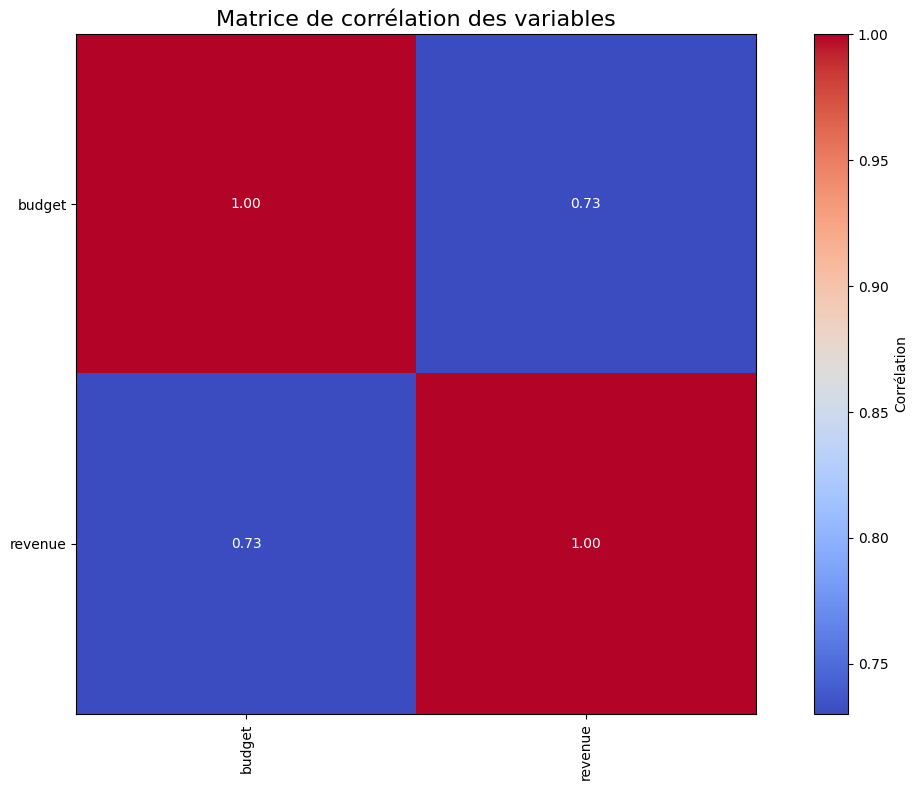

Matrice de corrélation :
           budget   revenue
budget   1.000000  0.730271
revenue  0.730271  1.000000


In [75]:
components_contribution = pd.DataFrame(
    pca_optimal.components_,
    columns=data.columns,
    index=[f"Composante {i+1}" for i in range(2)]
)

print("Contribution des variables aux composantes principales :")
print(components_contribution)

correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Corrélation')
plt.title('Matrice de corrélation des variables', fontsize=16)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.tight_layout()
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}",
                 ha='center', va='center', color='black' if abs(correlation_matrix.iloc[i, j]) < 0.5 else 'white')

plt.show()

print("Matrice de corrélation :")
print(correlation_matrix)

C:\Users\risto\AppData\Local\Temp\ipykernel_24092\2341953736.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('budget_bins')['revenue'].mean()


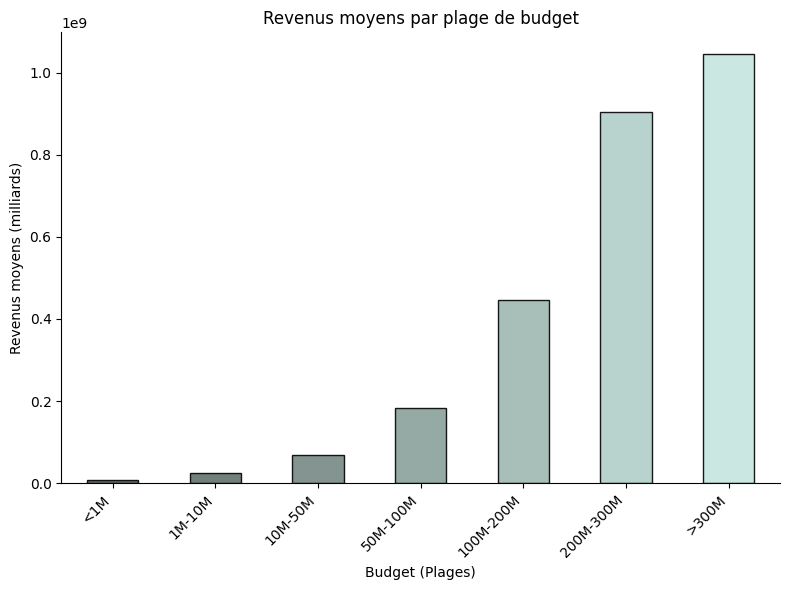

In [82]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

bins = [0, 1e6, 1e7, 5e7, 1e8, 2e8, 3e8, 1e9]
labels = ['<1M', '1M-10M', '10M-50M', '50M-100M', '100M-200M', '200M-300M', '>300M']

data['budget_bins'] = pd.cut(data['budget'], bins=bins, labels=labels)

grouped = data.groupby('budget_bins')['revenue'].mean()



base_color = mcolors.to_rgb('#c5e5de')
shades = [mcolors.to_hex([base_color[0] * (1 - i * 0.1),
                          base_color[1] * (1 - i * 0.1),
                          base_color[2] * (1 - i * 0.1)])
          for i in range(len(labels))]
shades = shades[::-1]  # Reverse the palette

plt.figure(figsize=(8, 6))
grouped.plot(kind='bar', color=shades, edgecolor='black', alpha=0.9)
plt.xticks(ticks=range(7), labels=labels, rotation=45, ha='right')
plt.title('Revenus moyens par plage de budget')
plt.xlabel('Budget (Plages)')
plt.ylabel('Revenus moyens (milliards)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().tick_params(left=True, bottom=True)
plt.grid(False)
plt.tight_layout()
plt.show()
